# Hamiltonian

In [27]:
#Laod current hamiltonian file
using LinearAlgebra, Plots
include("../src/hamiltonian.jl")

add_onsite_disorder (generic function with 1 method)

In [34]:
L   = 100 # number of sites
σ   = 1.0   # disorder
t   = 0.5 # hopping
E   = 2.   # on-site energy
ham = quasiperiodic_hamiltonian(L, Float64(pi), t, σ, E, qp_type="site");


In [35]:
#Spectrum
evals_list, evecs_list = eigen(ham);

evals_list[1:100]
#typeof(evecs_list)
#evecs_list
#size(evecs_list)

100-element Vector{Float64}:
 -1.3622670884895838
 -1.3622661516001084
 -1.3573550000479284
 -1.357349405532036
 -1.353133447736115
 -1.3531202961624862
 -1.3492554611706256
 -1.3485058313457026
 -1.3462637066252747
 -1.3444940433868273
  ⋮
  1.3453194245018567
  1.346027693689749
  1.348963275774698
  1.349659767724686
  1.3516579252331065
  1.3555066639505224
  1.3568457312421216
  1.3577347735858978
  1.4968944830542728

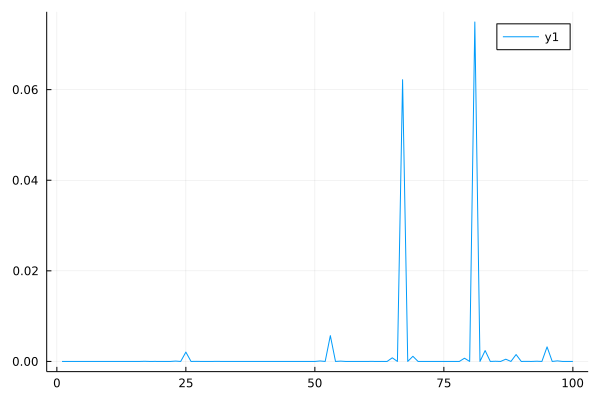

In [36]:
# Look at eigenvector
plot_inst = plot(1:L, abs.(evecs_list[:,8]).^4 )

#plot!(1:L, abs.(evecs_list[:,2]) ) 

plot_inst

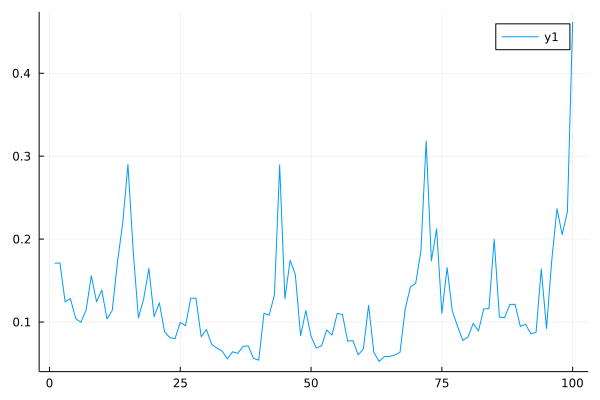

In [37]:
# plot ipr for some eigenstates
include("/Users/mrampp/Github/PKS_Julia_Hackathon/src/observables.jl")
ipr = inverse_participation_ratio(evecs_list)
#ipr
plot_ipr = plot(1:L, ipr )

plot_ipr

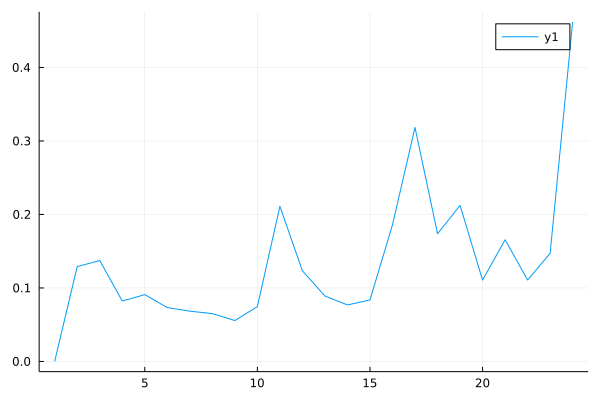

In [38]:
# energy resolved ipr
bins = LinRange(-1.6,1.6,25)
en_resolved_ipr = binned_average(evals_list, ipr, bins )
#en_resolved_ipr
plot_en_resolved_ipr = plot(1:length(bins)-1, en_resolved_ipr)

display(plot_en_resolved_ipr)

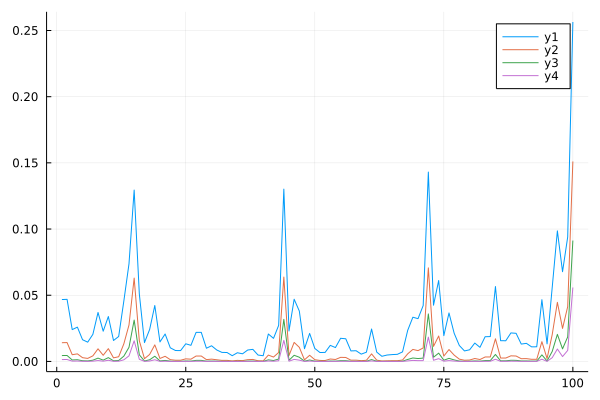

In [39]:
# plot further wavefunction moments
mom1 = wavefunction_moment(3,evecs_list)
plot_moments = plot(1:L, mom1 )
for q in 4:6
    mom_new = wavefunction_moment(q,evecs_list)
    plot!(1:L,mom_new)
end

plot_moments